Importing Libraries 

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mean: 29.69911764705882
Median: 28.0
Mode: [24.0]
Standard Deviation: 14.516321150817317
Q1 (25th percentile): 20.0
Q2 (Median or 50th percentile): 28.0
Q3 (75th percentile): 38.0

Outliers:
     PassengerId   Age
33            34  66.0
96            97  71.0
116          117  70.5
493          494  71.0
630          631  80.0
672          673  70.0
745          746  70.0
851          852  74.0


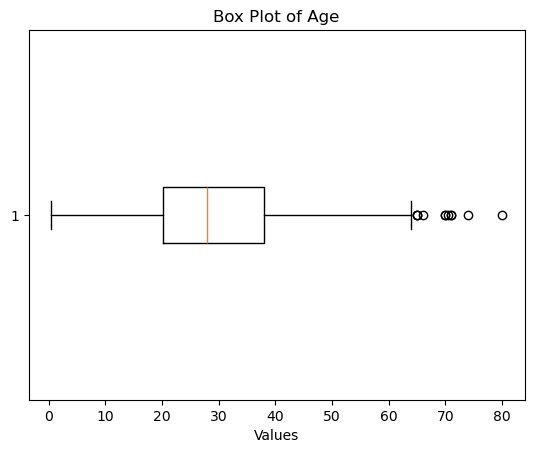

In [ ]:
# Function 
def calculate_mean(data):
    return sum(data) / len(data)

def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

def calculate_mode(data):
    frequency = {}
    for value in data:
        frequency[value] = frequency.get(value, 0) + 1
    max_count = max(frequency.values())
    modes = [key for key, count in frequency.items() if count == max_count]
    return modes

def calculate_standard_deviation(data):
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return variance ** 0.5

def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    # Calculate Q1
    lower_half = sorted_data[:n // 2]
    Q1 = calculate_median(lower_half)
    # Calculate Q3
    if n % 2 == 0:
        upper_half = sorted_data[n // 2:]
    else:
        upper_half = sorted_data[n // 2 + 1:]
    Q3 = calculate_median(upper_half)
    Q2 = calculate_median(sorted_data)
    return Q1, Q2, Q3

def plot_boxplot(data, column_name):
    plt.boxplot(data, vert=False)
    plt.title(f"Box Plot of {column_name}")
    plt.xlabel("Values")
    plt.show()
data = df["Age"].dropna().tolist()
mean = calculate_mean(data)
median = calculate_median(data)
mode = calculate_mode(data)
std_dev = calculate_standard_deviation(data)
Q1, Q2, Q3 = calculate_quartiles(data)

# Outliers
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]
data_no_outliers = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std_dev)
print("Q1 (25th percentile):", Q1)
print("Q2 (Median or 50th percentile):", Q2)
print("Q3 (75th percentile):", Q3)
print("\nOutliers:")
print(outliers[["PassengerId", "Age"]])
plot_boxplot(data, "Age")
